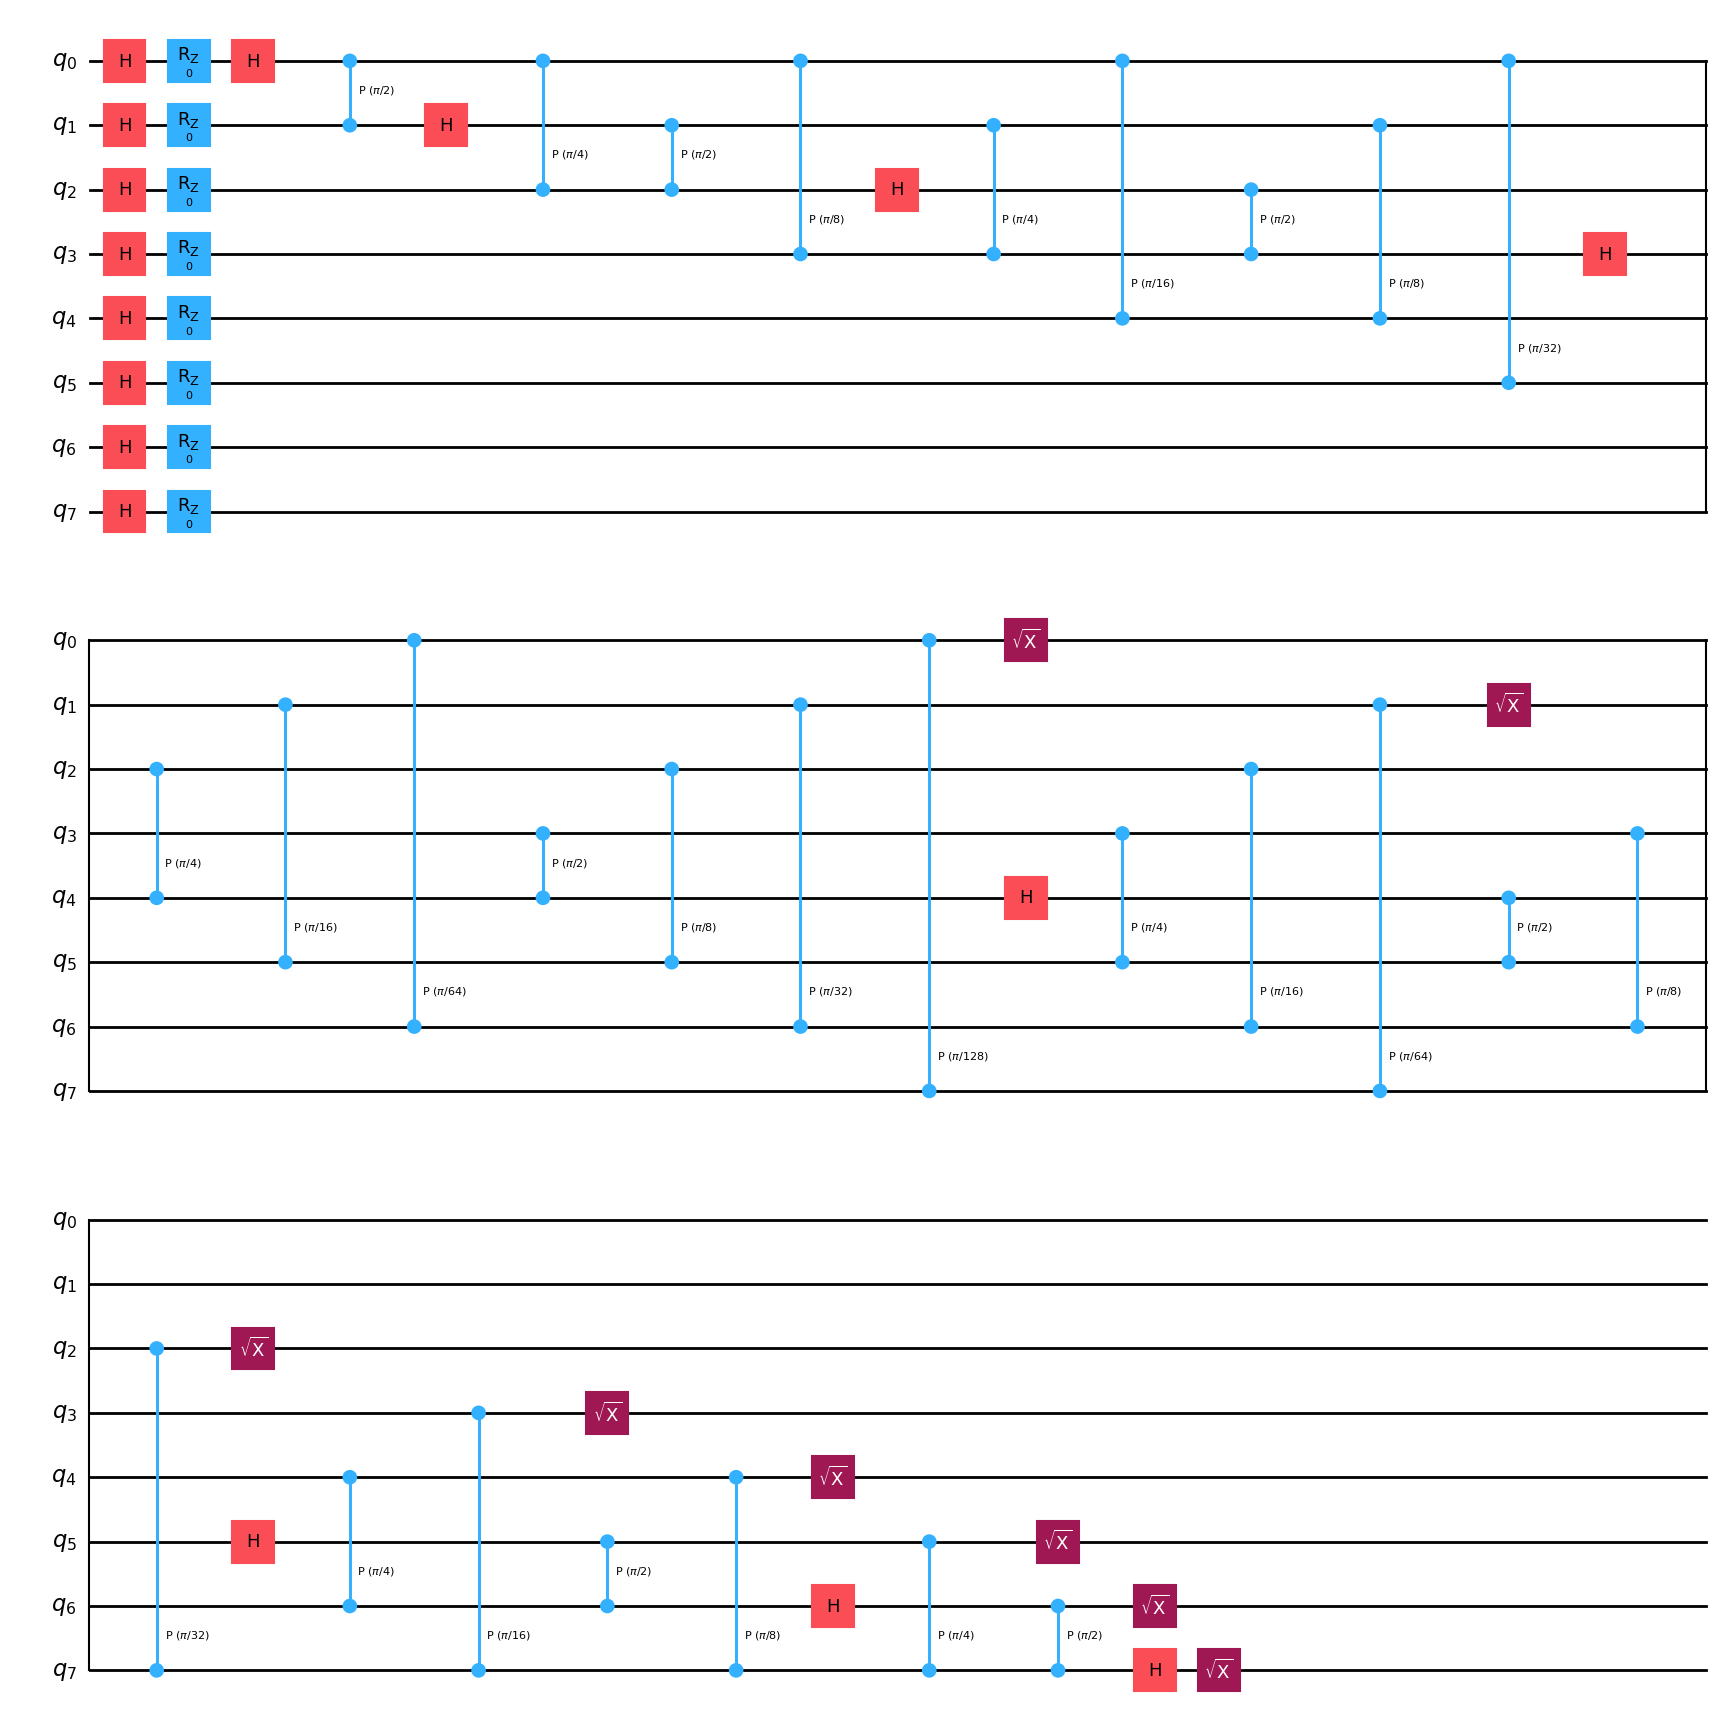

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from math   import sin

def qft(circ, n):
    """n-qubit QFT on q in circ."""
    for j in range(n):
        for k in range(j):
            circ.cp(pi / float(2 ** (j - k)), j, k)
        circ.h(j)


def qft_sin_function(n):
    qc = QuantumCircuit(n)
    for i in range (n):
        qc.h(i)
        # qc.rz(i*pi/(2*n),i)
        qc.rz(sin(4*i*2*pi/n)*pi/(2),i)
#        qc.sx(i) #Para construir funcion seno de x
    #Para aplicar la qft
    qft(qc,n)
    for i in range(n):
        qc.sx(i)
        
    return qc


    
n=8
qc = qft_sin_function(n)
qc.draw('mpl')



In [2]:
from qiskit.quantum_info import Pauli, SparsePauliOp
from itertools import product


combinations = list(product('IZ', repeat=n))
operator_strings = [Pauli(''.join(comb)) for comb in combinations] #['Z' * i + 'Z' + 'I' *(n-1-i) for i in range(n-1)]
print(operator_strings)
print(len(operator_strings))

operators = [SparsePauliOp(operator_strings) for operator_strings in operator_strings]
print(operators)

[Pauli('IIIIIIII'), Pauli('IIIIIIIZ'), Pauli('IIIIIIZI'), Pauli('IIIIIIZZ'), Pauli('IIIIIZII'), Pauli('IIIIIZIZ'), Pauli('IIIIIZZI'), Pauli('IIIIIZZZ'), Pauli('IIIIZIII'), Pauli('IIIIZIIZ'), Pauli('IIIIZIZI'), Pauli('IIIIZIZZ'), Pauli('IIIIZZII'), Pauli('IIIIZZIZ'), Pauli('IIIIZZZI'), Pauli('IIIIZZZZ'), Pauli('IIIZIIII'), Pauli('IIIZIIIZ'), Pauli('IIIZIIZI'), Pauli('IIIZIIZZ'), Pauli('IIIZIZII'), Pauli('IIIZIZIZ'), Pauli('IIIZIZZI'), Pauli('IIIZIZZZ'), Pauli('IIIZZIII'), Pauli('IIIZZIIZ'), Pauli('IIIZZIZI'), Pauli('IIIZZIZZ'), Pauli('IIIZZZII'), Pauli('IIIZZZIZ'), Pauli('IIIZZZZI'), Pauli('IIIZZZZZ'), Pauli('IIZIIIII'), Pauli('IIZIIIIZ'), Pauli('IIZIIIZI'), Pauli('IIZIIIZZ'), Pauli('IIZIIZII'), Pauli('IIZIIZIZ'), Pauli('IIZIIZZI'), Pauli('IIZIIZZZ'), Pauli('IIZIZIII'), Pauli('IIZIZIIZ'), Pauli('IIZIZIZI'), Pauli('IIZIZIZZ'), Pauli('IIZIZZII'), Pauli('IIZIZZIZ'), Pauli('IIZIZZZI'), Pauli('IIZIZZZZ'), Pauli('IIZZIIII'), Pauli('IIZZIIIZ'), Pauli('IIZZIIZI'), Pauli('IIZZIIZZ'), Pauli('IIZZ

In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

backend_name = "ibm_kyoto"
backend = QiskitRuntimeService().get_backend(backend_name)
pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)

qc_transpiled = pass_manager.run(qc)

operators_transpiled_list = [op.apply_layout(qc_transpiled.layout) for op in operators]


C:\Users\mpaur\AppData\Local\Temp\ipykernel_6176\4116969614.py:5: DeprecationWarning: The get_backend() method is deprecated as of qiskit-ibm-runtime 0.24 and will be removed no sooner than 3 months after the release date. Please use backend() instead.
  backend = QiskitRuntimeService().get_backend(backend_name)


In [4]:
from qiskit_ibm_runtime import Estimator as Estimator
from qiskit_ibm_runtime import EstimatorOptions

options = EstimatorOptions()
options.resilience_level = 1
options.optimization_level = 0
options.dynamical_decoupling.enable = True
options.dynamical_decoupling.sequence_type = "XY4"

estimator = Estimator(backend, options=options)

job = estimator.run([(qc_transpiled , operators_transpiled_list)])

job_id = job.job_id()

print(job_id)


cv8tf85emvv000850260


{'shots': 4096, 'target_precision': 0.015625, 'circuit_metadata': {}, 'resilience': {}, 'num_randomizations': 32}


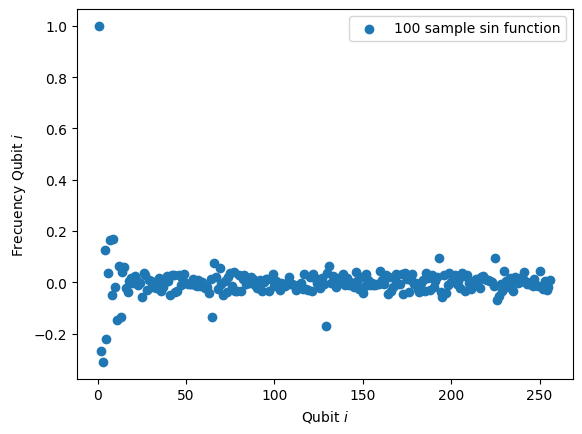

In [5]:
import matplotlib.pyplot as plt

data = list(range(1, len(operators)+1))
result = job.result()[0]
values = result.data.evs
values = [v/values[0] for v in values]

print(result.metadata)

plt.scatter(data, values, marker ='o', label = '100 sample sin function')
plt.xlabel('Qubit $i$')
plt.ylabel(r'Frecuency Qubit $i$')
plt.legend()
plt.show()